In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

# Example data
num_samples = 1000
time_steps = 10
features = 5
X = np.random.randn(num_samples, time_steps, features)
y = np.random.choice([0, 1, -1], num_samples)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data (optional)
scaler = StandardScaler()
X_train_scaled = np.array([scaler.fit_transform(x) for x in X_train])
X_test_scaled = np.array([scaler.transform(x) for x in X_test])

# Convert labels to one-hot encoding
y_train_mapped = y_train + 1  # Shift labels to 0, 1, 2
y_test_mapped = y_test + 1
y_train_one_hot = to_categorical(y_train_mapped)
y_test_one_hot = to_categorical(y_test_mapped)


2024-06-05 08:10:47.525040: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-05 08:10:47.605011: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-05 08:10:47.605073: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-05 08:10:47.608519: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-05 08:10:47.623414: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-05 08:10:49.085457: W tensorflow/compiler/tf2tensorrt/utils/py_utils.

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(time_steps, features), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))  # 3 units for 3 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            11200     
                                                                 
 dropout (Dropout)           (None, 10, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 3)                 153       
                                                                 
Total params: 31553 (123.25 KB)
Trainable params: 31553 (123.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [3]:
# Train the model
history = model.fit(X_train_scaled, y_train_one_hot, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
20/20 [==============================] - 6s 74ms/step - loss: 1.1014 - accuracy: 0.2953 - val_loss: 1.1013 - val_accuracy: 0.3000
Epoch 2/10
20/20 [==============================] - 0s 18ms/step - loss: 1.0961 - accuracy: 0.3672 - val_loss: 1.0995 - val_accuracy: 0.2875
Epoch 3/10
20/20 [==============================] - 0s 19ms/step - loss: 1.0931 - accuracy: 0.3672 - val_loss: 1.1019 - val_accuracy: 0.2812
Epoch 4/10
20/20 [==============================] - 0s 18ms/step - loss: 1.0925 - accuracy: 0.3719 - val_loss: 1.1060 - val_accuracy: 0.3000
Epoch 5/10
20/20 [==============================] - 0s 18ms/step - loss: 1.0922 - accuracy: 0.3656 - val_loss: 1.1033 - val_accuracy: 0.3688
Epoch 6/10
20/20 [==============================] - 0s 19ms/step - loss: 1.0872 - accuracy: 0.4047 - val_loss: 1.1178 - val_accuracy: 0.2750
Epoch 7/10
20/20 [==============================] - 0s 18ms/step - loss: 1.0834 - accuracy: 0.3938 - val_loss: 1.1089 - val_accuracy: 0.3250
Epoch 8/10
20

In [4]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test_one_hot)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


7/7 [==============================] - 1s 6ms/step - loss: 1.2034 - accuracy: 0.3350
Test Loss: 1.2033545970916748
Test Accuracy: 0.33500000834465027


In [9]:
# Predict on the test set
y_pred_probs = model.predict(X_test_scaled)

# Convert probabilities to class labels
y_pred_indices = np.argmax(y_pred_probs, axis=1)

7/7 [==============================] - 0s 6ms/step


In [10]:
y_pred_indices

array([2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       2, 1, 2, 2, 1, 0, 1, 2, 1, 1, 2, 1, 2, 2, 0, 1, 1, 2, 2, 1, 2, 2,
       2, 0, 2, 1, 1, 0, 1, 2, 1, 1, 0, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 0, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 0,
       2, 2, 2, 0, 2, 2, 1, 0, 2, 2, 2, 0, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2,
       1, 1, 1, 2, 2, 1, 2, 0, 2, 1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1,
       2, 2, 0, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1,
       2, 2])

In [4]:
import random
from deap import base, creator, tools, algorithms

# Initialize the creator with FitnessMax and Individual
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Define the fitness function
def fitness_function(individual):
    return sum(individual),

# Create the toolbox
toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, 10)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", fitness_function)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

# Initialize the population
population = toolbox.population(n=300)

# Run the genetic algorithm
NGEN = 40
CXPB, MUTPB = 0.5, 0.2
for gen in range(NGEN):
    offspring = toolbox.select(population, len(population))
    offspring = list(map(toolbox.clone, offspring))
    
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < CXPB:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values
    
    for mutant in offspring:
        if random.random() < MUTPB:
            toolbox.mutate(mutant)
            del mutant.fitness.values
    
    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit
    
    population[:] = offspring

best_ind = tools.selBest(population, 1)[0]
print(f"Best individual: {best_ind}, Fitness: {best_ind.fitness.values[0]}")


/home/bugra/.local/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/bugra/.local/lib/python3.10/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Best individual: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1], Fitness: 10.0


In [3]:
import random
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from deap import base, creator, tools, algorithms

# Initialize the creator with FitnessMax and Individual
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Generate synthetic financial data
np.random.seed(42)
X = np.random.rand(100, 1)
y = 4 + 3 * X.squeeze() + np.random.randn(100)

# Split into training and test sets
X_train, X_test = X[:80], X[80:]
y_train, y_test = y[:80], y[80:]

# Define the fitness function
def fitness_function(individual):
    model = LinearRegression()
    model.coef_ = np.array([individual[0]])
    model.intercept_ = individual[1]
    predictions = model.predict(X_test)
    error = mean_squared_error(y_test, predictions)
    fitness = 1 / (error + 1e-10)
    return fitness,

# Create the toolbox
toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, -10, 10)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, 2)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", fitness_function)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Initialize the population
population = toolbox.population(n=50)

# Run the genetic algorithm
NGEN = 100
CXPB, MUTPB = 0.5, 0.2
for gen in range(NGEN):
    offspring = toolbox.select(population, len(population))
    offspring = list(map(toolbox.clone, offspring))
    
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < CXPB:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values
    
    for mutant in offspring:
        if random.random() < MUTPB:
            toolbox.mutate(mutant)
            del mutant.fitness.values
    
    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit
    
    population[:] = offspring

best_ind = tools.selBest(population, 1)[0]
print(f"Best individual: {best_ind}, Fitness: {best_ind.fitness.values[0]}")


Best individual: [3.2918494209036986, 4.102523337405425], Fitness: 1.2363455310853593


In [1]:
import numpy as np
import pandas as pd

# Generate synthetic time series data
np.random.seed(42)
data = np.sin(np.linspace(0, 100, 200)) + np.random.normal(0, 0.1, 200)

# Convert to pandas DataFrame
df = pd.DataFrame(data, columns=['value'])

In [2]:
def create_features(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

window_size = 5
X, y = create_features(df['value'].values, window_size)

# Split into training and test sets
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


In [3]:
import random
from deap import base, creator, tools, algorithms
from sklearn.metrics import mean_squared_error

# Define the fitness function
def fitness_function(individual, X_train, y_train):
    # Individual is a set of coefficients for a linear model
    predictions = np.dot(X_train, individual)
    error = mean_squared_error(y_train, predictions)
    fitness = 1 / (error + 1e-10)
    return fitness,

# Initialize the creator with FitnessMax and Individual
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Create the toolbox
toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, -1, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, window_size)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", fitness_function, X_train=X_train, y_train=y_train)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# Initialize the population
population = toolbox.population(n=50)

# Run the genetic algorithm
NGEN = 100
CXPB, MUTPB = 0.5, 0.2
for gen in range(NGEN):
    offspring = toolbox.select(population, len(population))
    offspring = list(map(toolbox.clone, offspring))
    
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < CXPB:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values
    
    for mutant in offspring:
        if random.random() < MUTPB:
            toolbox.mutate(mutant)
            del mutant.fitness.values
    
    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit
    
    population[:] = offspring

best_ind = tools.selBest(population, 1)[0]
print(f"Best individual: {best_ind}, Fitness: {best_ind.fitness.values[0]}")


Best individual: [-0.4740702427614405, -0.18096896758689027, -0.05805783701124598, 0.37913692508336677, 0.378689433492527], Fitness: 65.36634283816869


Best individual coefficients: [-0.47407024 -0.18096897 -0.05805784  0.37913693  0.37868943]
Mean Squared Error of the best individual: 0.013282964703699695


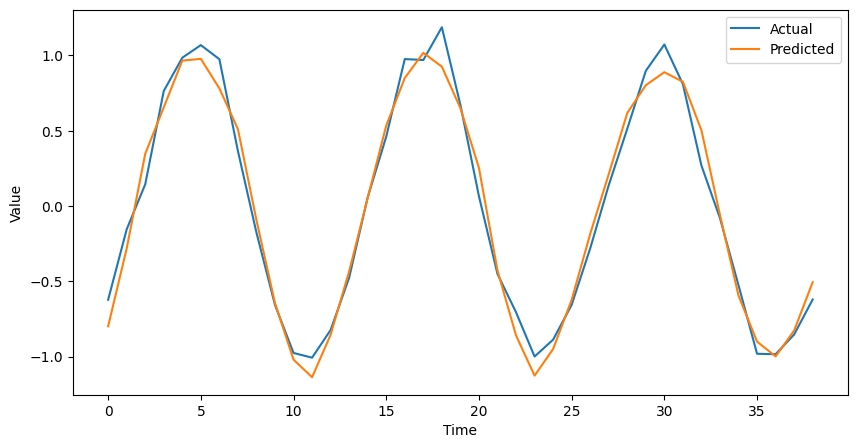

In [4]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Extract the coefficients from best_ind
coefficients = np.array(best_ind)

# Print the coefficients
print(f"Best individual coefficients: {coefficients}")

# Make predictions using the best individual on the test set
predictions = np.dot(X_test, coefficients)

# Calculate the prediction error
error = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error of the best individual: {error}")

# Optionally, plot the predictions against the actual values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(range(len(y_test)), y_test, label='Actual')
plt.plot(range(len(y_test)), predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


# sports betting draft

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(42)
n_samples = 100

# Features for player 1 and player 2
player1_features = np.random.rand(n_samples, 10)
player2_features = np.random.rand(n_samples, 10)

# Labels: probabilities of player 1 and player 2 winning
labels = np.random.rand(n_samples, 2)

# Difference features
difference_features = player1_features - player2_features

# Ratio features (avoid division by zero by adding a small constant)
ratio_features = player1_features / (player2_features + 1e-6)

# Concatenate original features with comparison features
combined_features = np.concatenate((player1_features, player2_features, difference_features, ratio_features), axis=1)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(combined_features, labels, test_size=0.2, random_state=42)

# Create Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [5]:
combined_features.shape, labels.shape

((100, 40), (100, 2))

In [6]:
import numpy as np

# Create a NumPy array
arr = np.array([10, 20, 30, 20, 40, 50, 20])

# Value to remove
value_to_remove = 20

# Find the indices of the value to remove
indices_to_remove = np.where(arr == value_to_remove)[0]

# Use numpy.delete to remove the elements at the found indices
arr_filtered = np.delete(arr, indices_to_remove)

print(arr_filtered)

[10 30 40 50]


In [7]:
indices_to_remove

array([1, 3, 6])